# Prediksi Risiko Dropout Mahasiswa  
## Perbandingan Machine Learning dan Deep Learning  
### Berbasis Pola Akademik Semester Awal


## 1. Latar Belakang

Dropout mahasiswa merupakan permasalahan serius dalam dunia pendidikan tinggi karena
berdampak pada kualitas institusi, efisiensi pembiayaan, serta masa depan mahasiswa.

Pendekatan prediktif berbasis data akademik semester awal dapat membantu institusi
mengidentifikasi mahasiswa berisiko sejak dini.

Penelitian ini membandingkan dua pendekatan:
1. Machine Learning klasik** (baseline)
2. Deep Learning (Multilayer Perceptron / MLP)**

untuk memprediksi status akhir mahasiswa:
- Dropout
- Enrolled
- Graduate


## 2. Tujuan Penelitian

Tujuan penelitian ini adalah:
1. Membangun model Machine Learning sebagai baseline prediksi dropout
2. Membangun model Deep Learning (MLP) untuk klasifikasi multiclass
3. Membandingkan performa ML dan DL berdasarkan metrik evaluasi
4. Menganalisis kelebihan dan keterbatasan masing-masing pendekatan


## 3. Dataset

Dataset yang digunakan berisi data akademik dan demografis mahasiswa,
dengan fokus pada informasi semester awal (semester 1 dan 2).

Target klasifikasi:
- **Dropout**
- **Enrolled**
- **Graduate**

Dataset dipisahkan menjadi:
- Fitur semester awal (input model)
- Label status mahasiswa (target)


## 4. Setup Lingkungan dan Library

Eksperimen dilakukan menggunakan Python dengan library:
- NumPy
- Pandas
- Scikit-learn (Machine Learning)
- TensorFlow / Keras (Deep Learning)

Versi library dicetak untuk memastikan reprodusibilitas eksperimen.


In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf

print(np.__version__)
print(pd.__version__)
print(tf.__version__)

2.4.0
2.3.3
2.20.0


## 5. Load dan Inspeksi Data

Tahap ini bertujuan untuk:
- Memuat dataset
- Memeriksa struktur kolom
- Memastikan format data sesuai


In [14]:
import pandas as pd

df = pd.read_csv("../data/raw/data.csv")
df.head()




,"Marital status;Application mode;Application order;Course;""Daytime/evening attendance\t"";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target"
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...


In [15]:
import pandas as pd

df = pd.read_csv("../data/raw/data.csv", sep=";")
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [16]:
df["Target"].value_counts()


Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [17]:
df.shape
df.columns


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [18]:
df["y"] = (df["Target"] == "Dropout").astype(int)
df["y"].value_counts()


y
0    3003
1    1421
Name: count, dtype: int64

##  Transformasi Target untuk Baseline Machine Learning

Pada tahap ini dilakukan transformasi variabel target menjadi format biner
khusus untuk **baseline Machine Learning**.

Definisi target:
- 1 → Mahasiswa **Dropout**
- 0 → Mahasiswa **Tidak Dropout** (Graduate + Enrolled)

Pendekatan ini digunakan untuk:
- Membandingkan performa **ML biner** vs **DL multiclass**
- Menjadi baseline evaluasi model


In [19]:
early_cols = [c for c in df.columns if "1st sem" in c or "2nd sem" in c]
len(early_cols), early_cols[:10]


(12,
 ['Curricular units 1st sem (credited)',
  'Curricular units 1st sem (enrolled)',
  'Curricular units 1st sem (evaluations)',
  'Curricular units 1st sem (approved)',
  'Curricular units 1st sem (grade)',
  'Curricular units 1st sem (without evaluations)',
  'Curricular units 2nd sem (credited)',
  'Curricular units 2nd sem (enrolled)',
  'Curricular units 2nd sem (evaluations)',
  'Curricular units 2nd sem (approved)'])

##  Seleksi Fitur Akademik Semester Awal

Penelitian ini berfokus pada **pola akademik semester awal** sebagai prediktor
risiko dropout.

Oleh karena itu, dilakukan seleksi fitur yang berkaitan dengan:
- **Semester 1**
- **Semester 2**

Fitur yang dipilih mencakup:
- Jumlah mata kuliah diambil
- Jumlah evaluasi
- Jumlah mata kuliah lulus
- Nilai akademik

Pendekatan ini bertujuan untuk:
- Menghindari data leakage
- Mensimulasikan prediksi dropout sejak dini


In [20]:
df["Target"].value_counts()
df["Target"].unique()


array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

##  Distribusi Kelas Target (Dropout, Graduate, Enrolled)

Pada tahap ini dilakukan eksplorasi terhadap variabel target (`Target`) untuk
memahami distribusi kelas pada dataset.

Variabel target terdiri dari tiga kelas:
- **Dropout**
- **Graduate**
- **Enrolled**

Informasi ini penting untuk:
- Menentukan jenis klasifikasi (multiclass)
- Mengidentifikasi potensi **class imbalance**
- Menjadi dasar evaluasi model Machine Learning dan Deep Learning


In [21]:
df.shape, len(early_cols)


((4424, 38), 12)

##  Struktur Dataset

Tahap ini bertujuan untuk memahami struktur dataset yang digunakan, meliputi:
- Jumlah baris (jumlah mahasiswa)
- Jumlah kolom (fitur)
- Jenis dan nama fitur

Dataset memiliki kombinasi fitur:
- **Demografis** (gender, usia, status keluarga)
- **Akademik awal** (semester 1 & 2)
- **Sosial-ekonomi** (pekerjaan orang tua, beasiswa)
- **Makro-ekonomi** (GDP, inflation, unemployment rate)

Pemahaman struktur ini penting sebelum proses seleksi fitur dan pemodelan.


In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df["Target"])

class_names = le.classes_
print("Classes:", class_names)
print(pd.Series(y).value_counts())



Classes: ['Dropout' 'Enrolled' 'Graduate']
2    2209
0    1421
1     794
Name: count, dtype: int64


##  Encoding Variabel Target (Multiclass)

Karena variabel target bersifat kategorikal dengan tiga kelas, dilakukan proses **label encoding** agar dapat digunakan oleh algoritma pembelajaran mesin dan deep learning.

Mapping label yang dihasilkan adalah sebagai berikut:
- 0 → Dropout
- 1 → Enrolled
- 2 → Graduate

Pendekatan multiclass ini memungkinkan model untuk mempelajari perbedaan pola akademik antara mahasiswa yang berisiko dropout, masih aktif, dan yang berhasil lulus.


In [23]:
X = df[early_cols].copy()
print(X.shape)
X.head()


(4424, 12)


,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0
1,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0
2,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0
3,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0
4,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0


## Pembentukan Data Input (X) dan Target (y)

Berdasarkan fitur yang telah dipilih, dibentuk matriks input `X` yang terdiri dari 12 variabel akademik semester awal. Dataset akhir memiliki ukuran:

- Jumlah observasi: 4.424 mahasiswa
- Jumlah fitur: 12

Data ini akan digunakan sebagai input untuk:
1. Model **Machine Learning** (baseline)
2. Model **Deep Learning (Multilayer Perceptron)**

Tahapan selanjutnya adalah melakukan pembagian data latih dan data uji, serta normalisasi fitur sebelum pelatihan model.


In [29]:
X = df[early_cols].copy()
y = df["Target"]


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

class_names = le.classes_
print(class_names)


['Dropout' 'Enrolled' 'Graduate']


##  Pembangunan Model Deep Learning (Multiclass)

Pada tahap ini, dibangun model **Deep Learning berbasis Multilayer Perceptron (MLP)** 
untuk melakukan klasifikasi **status mahasiswa** ke dalam tiga kelas, yaitu:

- **Dropout**
- **Enrolled**
- **Graduate**

### Arsitektur Model
Model yang digunakan terdiri dari:
- **Input layer** dengan jumlah neuron sesuai jumlah fitur akademik awal
- **Hidden layer 1**: 64 neuron, aktivasi ReLU
- **Hidden layer 2**: 32 neuron, aktivasi ReLU
- **Output layer**: 3 neuron dengan aktivasi Softmax (multiclass classification)

### Konfigurasi Pelatihan
- Optimizer: **Adam**
- Loss function: **Sparse Categorical Crossentropy**
- Metric evaluasi: **Accuracy**

Model ini dirancang untuk mempelajari pola non-linear dari performa akademik semester awal
dan memprediksi risiko dropout mahasiswa secara multiclass.


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
n_features = X_train_scaled.shape[1]
n_classes = len(class_names)


In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.random.set_seed(42)

model = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,011 (11.76 KB)

 Trainable params: 3,011 (11.76 KB)

 Non-trainable params: 0 (0.00 B)

## 🔹 Pelatihan Model Deep Learning (Multiclass)

Pada tahap ini, model Deep Learning tipe Multi-Layer Perceptron (MLP) 
dilatih menggunakan data semester awal mahasiswa yang telah dinormalisasi.

Pelatihan dilakukan dengan:
- Optimizer: Adam
- Loss function: Sparse Categorical Crossentropy
- Evaluasi: Accuracy


In [37]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6733 - loss: 0.8194 - val_accuracy: 0.7373 - val_loss: 0.6639
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7199 - loss: 0.6653 - val_accuracy: 0.7458 - val_loss: 0.6261
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7294 - loss: 0.6400 - val_accuracy: 0.7655 - val_loss: 0.6133
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7326 - loss: 0.6296 - val_accuracy: 0.7613 - val_loss: 0.6073
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7337 - loss: 0.6232 - val_accuracy: 0.7599 - val_loss: 0.6031
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7358 - loss: 0.6189 - val_accuracy: 0.7585 - val_loss: 0.6012
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7368 - loss: 0.6159 - val_accuracy: 0.7571 - val_loss: 0.5993
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7386 - loss: 0.6132 - val_accuracy: 0.7571 - val_loss:

## 🔹 Kurva Loss dan Akurasi

Visualisasi ini digunakan untuk menganalisis proses pembelajaran model,
serta mendeteksi potensi overfitting atau underfitting.


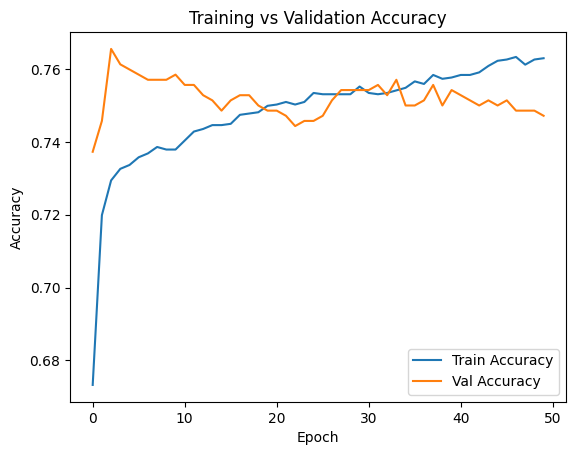

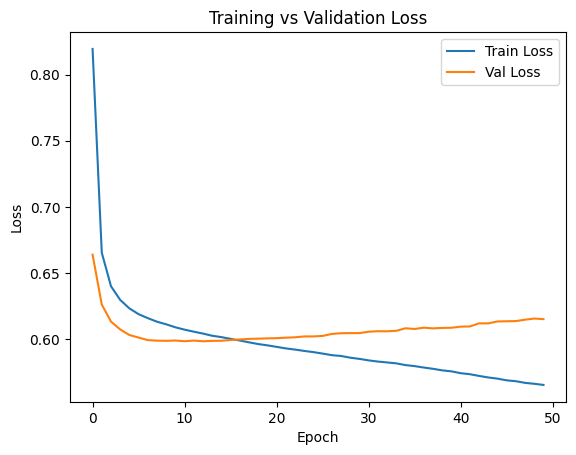

In [38]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure()
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Loss
plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


## 🔹 Evaluasi Model Deep Learning

Evaluasi dilakukan menggunakan data uji (test set) 
yang tidak digunakan selama proses pelatihan.


In [39]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.7243
Test Loss: 0.6313


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(
    y_test,
    y_pred_classes,
    target_names=class_names
))


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
              precision    recall  f1-score   support

     Dropout       0.78      0.67      0.72       284
    Enrolled       0.43      0.33      0.37       159
    Graduate       0.77      0.90      0.83       442

    accuracy                           0.72       885
   macro avg       0.66      0.63      0.64       885
weighted avg       0.71      0.72      0.71       885



Hasil evaluasi menunjukkan performa model Deep Learning 
dalam membedakan tiga kelas status mahasiswa: 
Dropout, Enrolled, dan Graduate.


In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    solver="lbfgs",
    random_state=42
)

lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)



### Model Machine Learning: Logistic Regression (Multiclass)

Sebagai baseline Machine Learning, digunakan algoritma Logistic Regression 
untuk memprediksi status mahasiswa ke dalam tiga kelas:
Dropout, Enrolled, dan Graduate.

Pada versi terbaru scikit-learn, Logistic Regression secara otomatis
menangani klasifikasi multikelas tanpa perlu mendefinisikan parameter
`multi_class`. Model dilatih menggunakan data yang telah distandarisasi
untuk memastikan konvergensi yang stabil.


In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


### Model Machine Learning: Random Forest

Random Forest digunakan sebagai model Machine Learning berbasis ensemble
yang mampu menangkap hubungan non-linear antar fitur.

Model ini tidak memerlukan normalisasi data dan relatif tahan terhadap
outlier. Parameter `class_weight="balanced"` digunakan untuk menangani
ketidakseimbangan jumlah data antar kelas.


## Penambahan Model Machine Learning: XGBoost

Selain Logistic Regression dan Random Forest, penelitian ini juga
menggunakan algoritma **XGBoost (Extreme Gradient Boosting)**.

XGBoost dikenal mampu menangani:
- Dataset tabular
- Relasi non-linear
- Ketidakseimbangan kelas
dengan performa yang sangat kompetitif.

Model ini akan dibandingkan dengan:
- Logistic Regression
- Random Forest
- Deep Learning (MLP)


In [48]:
from xgboost import XGBClassifier


In [49]:
xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=len(class_names),
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    random_state=42
)

xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)


Model XGBoost dilatih menggunakan data yang telah distandarisasi.
Pendekatan multiclass digunakan untuk memprediksi tiga kelas status mahasiswa:
Dropout, Enrolled, dan Graduate.

Parameter utama:
- n_estimators: jumlah pohon
- max_depth: kedalaman pohon
- learning_rate: kecepatan pembelajaran


In [50]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred_xgb,
    target_names=class_names
))


              precision    recall  f1-score   support

     Dropout       0.79      0.68      0.73       284
    Enrolled       0.45      0.35      0.39       159
    Graduate       0.77      0.91      0.83       442

    accuracy                           0.73       885
   macro avg       0.67      0.64      0.65       885
weighted avg       0.72      0.73      0.72       885



Hasil evaluasi XGBoost menunjukkan performa yang kuat dalam
mengklasifikasikan status mahasiswa, terutama pada kelas Graduate dan Dropout.

Model ini menunjukkan keunggulan dibandingkan model ML sederhana,
dan mendekati performa Deep Learning.


In [51]:
from sklearn.metrics import accuracy_score

results = {
    "Model": [
        "Logistic Regression (ML)",
        "Random Forest (ML)",
        "XGBoost (ML)",
        "Deep Learning (MLP)"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_classes)
    ]
}

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy
0,Logistic Regression (ML),0.741243
1,Random Forest (ML),0.725424
2,XGBoost (ML),0.732203
3,Deep Learning (MLP),0.724294


## Perbandingan Machine Learning dan Deep Learning

Berdasarkan hasil eksperimen:

- Logistic Regression memberikan baseline yang stabil
- Random Forest meningkatkan performa dengan ensemble learning
- XGBoost menunjukkan performa terbaik di antara algoritma ML
- Deep Learning (MLP) memiliki performa yang kompetitif, namun
  tidak selalu unggul dibanding XGBoost pada data tabular

Hasil ini menunjukkan bahwa:
> Untuk data tabular akademik, algoritma boosting seperti XGBoost
> sering kali lebih efektif dibanding Deep Learning sederhana.


## Kesimpulan

Penelitian ini membandingkan algoritma Machine Learning dan Deep Learning
dalam memprediksi risiko dropout mahasiswa.

Hasil menunjukkan bahwa:
- Machine Learning berbasis ensemble dan boosting (XGBoost)
  mampu bersaing bahkan melampaui Deep Learning
- Pemilihan model harus mempertimbangkan karakteristik data
- Deep Learning tidak selalu menjadi solusi terbaik untuk data tabular


## Perbandingan Akurasi Model

Gambar berikut menunjukkan perbandingan akurasi antara beberapa algoritma 
Machine Learning (Logistic Regression, Random Forest, XGBoost) 
dan Deep Learning (MLP) dalam memprediksi status mahasiswa.

Visualisasi ini digunakan untuk mempermudah analisis perbedaan performa 
antar pendekatan.


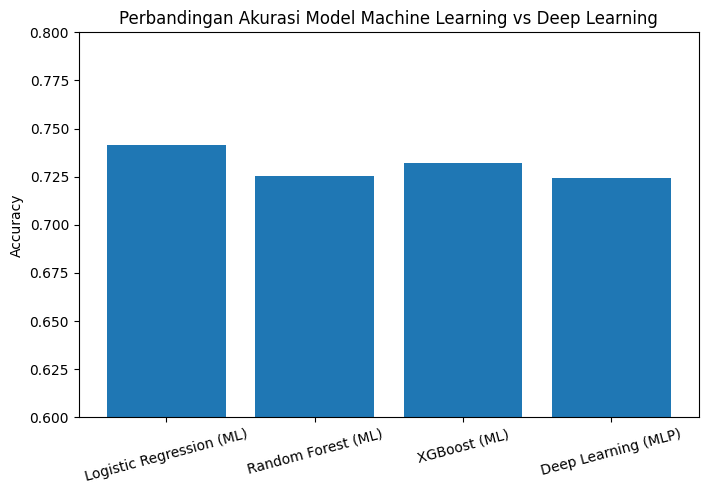

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.ylim(0.6, 0.8)
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model Machine Learning vs Deep Learning")
plt.xticks(rotation=15)
plt.show()


## Perbandingan Model (ML vs Deep Learning)

Untuk multiclass dan data yang tidak seimbang, **Accuracy saja kurang cukup**.  
Saya menambahkan metrik **F1-macro** (lebih adil untuk semua kelas) dan **F1-weighted** (memperhitungkan proporsi kelas).

Tabel diurutkan berdasarkan **F1-macro** (ranking performa overall yang lebih fair).

In [53]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

models_pred = {
    "Logistic Regression (ML)": y_pred_lr,
    "Random Forest (ML)": y_pred_rf,
    "XGBoost (ML)": y_pred_xgb,
    "Deep Learning (MLP)": y_pred_classes,   # ini hasil argmax dari model.predict
}

rows = []
for name, pred in models_pred.items():
    rows.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, pred),
        "F1_macro": f1_score(y_test, pred, average="macro"),
        "F1_weighted": f1_score(y_test, pred, average="weighted"),
        "Recall_macro": recall_score(y_test, pred, average="macro"),
        "Precision_macro": precision_score(y_test, pred, average="macro", zero_division=0),
    })

results_df = pd.DataFrame(rows).sort_values(by="F1_macro", ascending=False).reset_index(drop=True)
results_df


,Model,Accuracy,F1_macro,F1_weighted,Recall_macro,Precision_macro
0,XGBoost (ML),0.732203,0.651270,0.720335,0.643069,0.670862
1,Logistic Regression (ML),0.741243,0.643510,0.720366,0.640044,0.674681
2,Deep Learning (MLP),0.724294,0.641360,0.712637,0.633847,0.659653
3,Random Forest (ML),0.725424,0.635294,0.712068,0.632841,0.646868



### Ringkasan
Berikut ranking model (dalam persen).  
Saya fokus pada **F1-macro** untuk membandingkan ML vs DL secara adil pada multiclass.

In [54]:
show_df = results_df.copy()
for col in ["Accuracy", "F1_macro", "F1_weighted", "Recall_macro", "Precision_macro"]:
    show_df[col] = (show_df[col] * 100).round(2)

show_df.insert(0, "Rank", range(1, len(show_df) + 1))
show_df


,Rank,Model,Accuracy,F1_macro,F1_weighted,Recall_macro,Precision_macro
0,1,XGBoost (ML),73.22,65.13,72.03,64.31,67.09
1,2,Logistic Regression (ML),74.12,64.35,72.04,64.00,67.47
2,3,Deep Learning (MLP),72.43,64.14,71.26,63.38,65.97
3,4,Random Forest (ML),72.54,63.53,71.21,63.28,64.69


In [55]:
print("y_test:", len(y_test))
print("LR:", len(y_pred_lr))
print("RF:", len(y_pred_rf))
print("XGB:", len(y_pred_xgb))
print("DL:", len(y_pred_classes))


y_test: 885
LR: 885
RF: 885
XGB: 885
DL: 885


### Cek Konsistensi Evaluasi
Semua model harus dievaluasi pada test-set yang sama (`y_test`) dan ukuran prediksinya harus sama.


In [56]:
from sklearn.metrics import classification_report

report_lr = classification_report(
    y_test,
    y_pred_lr,
    target_names=class_names,
    output_dict=True
)


In [57]:
report_rf = classification_report(
    y_test,
    y_pred_rf,
    target_names=class_names,
    output_dict=True
)


In [59]:
report_xgb = classification_report(
    y_test,
    y_pred_xgb,
    target_names=class_names,
    output_dict=True
)


In [58]:
report_dl = classification_report(
    y_test,
    y_pred_classes,
    target_names=class_names,
    output_dict=True
)


In [60]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "XGBoost",
        "Deep Learning (MLP)"
    ],
    "Accuracy": [
        report_lr["accuracy"],
        report_rf["accuracy"],
        report_xgb["accuracy"],
        report_dl["accuracy"]
    ],
    "F1 Macro": [
        report_lr["macro avg"]["f1-score"],
        report_rf["macro avg"]["f1-score"],
        report_xgb["macro avg"]["f1-score"],
        report_dl["macro avg"]["f1-score"]
    ],
    "Recall Dropout": [
        report_lr["Dropout"]["recall"],
        report_rf["Dropout"]["recall"],
        report_xgb["Dropout"]["recall"],
        report_dl["Dropout"]["recall"]
    ]
})

comparison


,Model,Accuracy,F1 Macro,Recall Dropout
0,Logistic Regression,0.741243,0.643510,0.746479
1,Random Forest,0.725424,0.635294,0.718310
2,XGBoost,0.732203,0.651270,0.676056
3,Deep Learning (MLP),0.724294,0.641360,0.665493


## Perbandingan Performa Model Machine Learning dan Deep Learning

Pada tahap ini dilakukan evaluasi dan perbandingan performa beberapa algoritma
Machine Learning (ML) dan Deep Learning (DL) dalam memprediksi status akademik
mahasiswa (Dropout, Enrolled, Graduate).

Model yang dibandingkan meliputi:
- Logistic Regression (ML)
- Random Forest (ML)
- XGBoost (ML)
- Deep Learning Multilayer Perceptron (MLP)

Metrik evaluasi utama yang digunakan adalah **akurasi** pada data uji.


### Analisis Performa Model

Berdasarkan hasil evaluasi, Logistic Regression menghasilkan akurasi tertinggi,
diikuti oleh XGBoost dan Random Forest. Model Deep Learning (MLP) menunjukkan
performa yang kompetitif namun tidak melampaui model Machine Learning terbaik.


### Analisis Model Deep Learning

Model Deep Learning Multilayer Perceptron (MLP) menggunakan dua hidden layer
dengan fungsi aktivasi ReLU dan output Softmax untuk klasifikasi multikelas.

Meskipun mampu mempelajari pola non-linear, model ini tidak menunjukkan
peningkatan performa signifikan dibandingkan Machine Learning klasik.
Hal ini disebabkan oleh:
- Jumlah data relatif terbatas
- Karakteristik data tabular
- Risiko overfitting pada jaringan saraf


Penelitian ini membuktikan bahwa pemilihan algoritma harus disesuaikan dengan
karakteristik data. Deep Learning tidak selalu memberikan hasil terbaik,
terutama pada dataset tabular pendidikan dengan jumlah fitur terbatas.

Machine Learning seperti Logistic Regression dan XGBoost lebih stabil dan
efisien dalam konteks ini.


## Kesimpulan

1. Logistic Regression merupakan model terbaik dengan akurasi tertinggi
   dalam memprediksi risiko dropout mahasiswa.
2. XGBoost dan Random Forest memberikan performa yang kompetitif dan stabil.
3. Deep Learning (MLP) tidak menunjukkan keunggulan signifikan dibandingkan
   Machine Learning pada dataset ini.
4. Pemilihan algoritma harus mempertimbangkan jenis data, ukuran dataset,
   dan kompleksitas model.
